# HOUSE PRICE PREDICTION

AIM : The major aim is to understand the dataset and to train and test the dataset for future predictions.

DATA COLLECTION : The data were extracted from the kaggle.


# DATA PREPROCESSING

In [1]:
# IMPORTING THE DATA
import pandas as pd

# IMPORTING THE NUMPY FOR NUMERIC FUNCTIONS
import numpy as np

# IMPORTING THE DATA VISUALIZATION PACKAGES
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING VARIOUS MODELS FROM SCIKIT LEARN
from sklearn.preprocessing import StandardScaler , MinMaxScaler, OneHotEncoder 
from sklearn.linear_model import Lasso,Ridge 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# NEGLECTING THE WARNINGS
import warnings
warnings.filterwarnings("ignore")

IMPORTING DATA

In [2]:
df = pd.read_csv("housing_price.csv")
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


EXPLORATORY DATA ANALYSIS

In [3]:
# checking for the info of the factors
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
# checking for duplicated values
df.duplicated().sum()

0

In [5]:
#checking the shape of the data (rows,columns)
df.shape

(545, 13)

In [6]:
# checking how many columns
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
df.bathrooms.value_counts()

1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64

In [8]:
df["bathrooms"].unique()

array([2, 4, 1, 3], dtype=int64)

In [9]:
df.bedrooms.value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [10]:
df["bedrooms"].unique()

array([4, 3, 5, 2, 6, 1], dtype=int64)

In [11]:
df.stories.value_counts()

2    238
1    227
4     41
3     39
Name: stories, dtype: int64

In [12]:
df["stories"].unique()

array([3, 4, 2, 1], dtype=int64)

In [13]:
df.area.value_counts()

6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: area, Length: 284, dtype: int64

In [14]:
df["area"].unique()

array([ 7420,  8960,  9960,  7500,  8580, 16200,  8100,  5750, 13200,
        6000,  6550,  3500,  7800,  6600,  8500,  4600,  6420,  4320,
        7155,  8050,  4560,  8800,  6540,  8875,  7950,  5500,  7475,
        7000,  4880,  5960,  6840,  7482,  9000,  6360,  6480,  4300,
        7440,  6325,  5150, 11440,  7680,  8880,  6240, 11175,  7700,
       12090,  4000,  5020,  4040,  4260,  6500,  5700, 10500,  3760,
        8250,  6670,  3960,  7410,  5000,  6750,  4800,  7200,  4100,
        6400,  6350,  4500,  5450,  3240,  6615,  8372,  9620,  6800,
        8000,  6900,  3700,  7020,  7231,  6254,  7320,  6525, 15600,
        7160, 11460,  5828,  5200,  5400,  4640,  5800,  6660,  4700,
        5136,  4400,  3300,  3650,  6100,  2817,  7980,  3150,  6210,
        6825,  6710,  6450, 10269,  8400,  5300,  3800,  9800,  8520,
        6050,  7085,  3180,  3410,  3000, 11410,  5720,  3540,  7600,
       10700,  8150,  4410,  7686,  2800,  5948,  4200,  4520,  4095,
        4120,  4770,

In [15]:
df.parking.value_counts()

0    299
1    126
2    108
3     12
Name: parking, dtype: int64

In [16]:
df["parking"].unique()

array([2, 3, 0, 1], dtype=int64)

In [17]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [18]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [19]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# DATA VISUALIZATION

<AxesSubplot:>

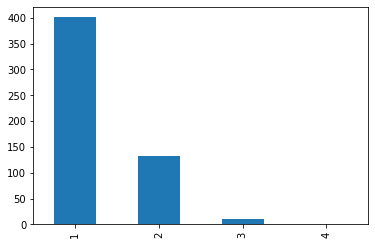

In [20]:
df.bathrooms.value_counts().plot(kind='bar')

<AxesSubplot:>

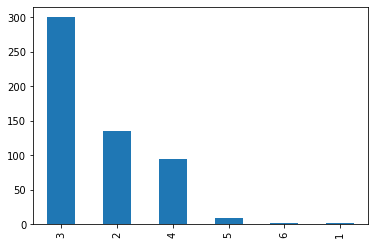

In [21]:
df.bedrooms.value_counts().plot(kind='bar')

<AxesSubplot:>

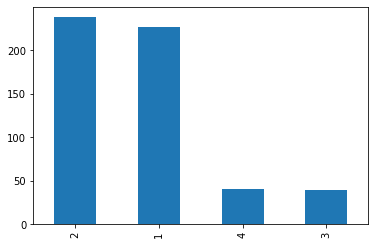

In [22]:
df.stories.value_counts().plot(kind='bar')

<AxesSubplot:>

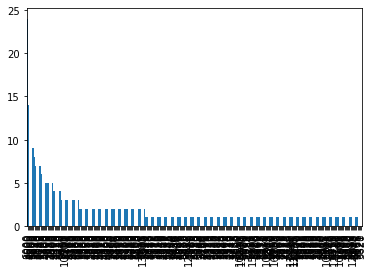

In [23]:
df.area.value_counts().plot(kind='bar')

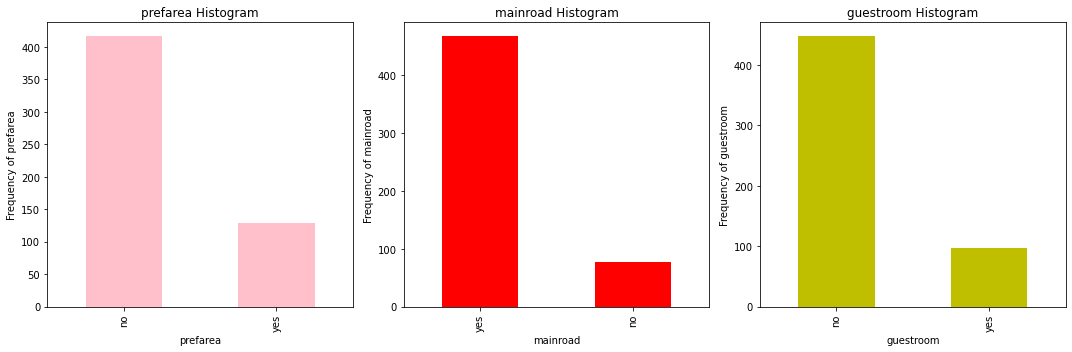

In [24]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# First subplot
plt1 = df['prefarea'].value_counts().plot(kind='bar', color='pink', ax=axes[0])
plt1.set_title('prefarea Histogram')
plt1.set(xlabel='prefarea', ylabel='Frequency of prefarea')

# Second subplot
plt2 = df['mainroad'].value_counts().plot(kind='bar', color='r', ax=axes[1])
plt2.set_title('mainroad Histogram')
plt2.set(xlabel='mainroad', ylabel='Frequency of mainroad')

# Third subplot
plt3 = df['guestroom'].value_counts().plot(kind='bar', color='y', ax=axes[2])
plt3.set_title('guestroom Histogram')
plt3.set(xlabel='guestroom', ylabel='Frequency of guestroom')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


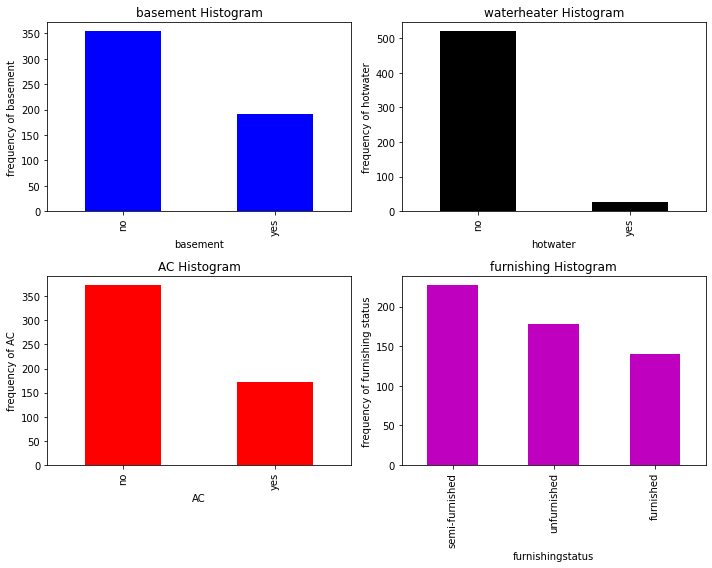

In [25]:

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# First subplot
plt1 = df['basement'].value_counts().plot(kind='bar', color='b', ax=axes[0, 0])
plt1.set_title('basement Histogram')
plt1.set(xlabel='basement', ylabel='frequency of basement')

# Second subplot
plt2 = df['hotwaterheating'].value_counts().plot(kind='bar', color='black', ax=axes[0, 1])
plt2.set_title('waterheater Histogram')
plt2.set(xlabel='hotwater', ylabel='frequency of hotwater')

# Third subplot
plt3 = df['airconditioning'].value_counts().plot(kind='bar', color='r', ax=axes[1, 0])
plt3.set_title('AC Histogram')
plt3.set(xlabel='AC', ylabel='frequency of AC')

# Fourth subplot
plt4 = df['furnishingstatus'].value_counts().plot(kind='bar', color='m', ax=axes[1, 1])
plt4.set_title('furnishing Histogram')
plt4.set(xlabel='furnishingstatus', ylabel='frequency of furnishing status')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


<AxesSubplot:xlabel='airconditioning', ylabel='bedrooms'>

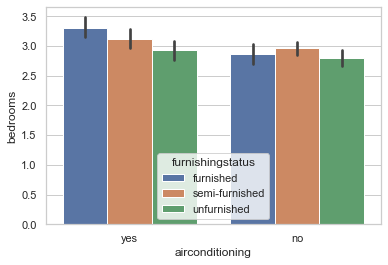

In [27]:
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

<AxesSubplot:xlabel='hotwaterheating', ylabel='bathrooms'>

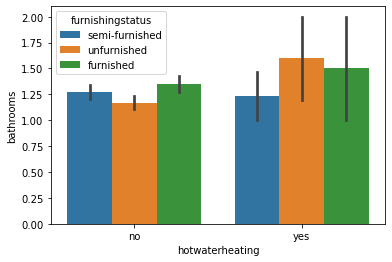

In [142]:
sns.barplot(x=df['hotwaterheating'],y=df['bathrooms'],hue=df["furnishingstatus"])

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x1fde2c0b580>,
 'caps': [<matplotlib.lines.Line2D at 0x1fde2752fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fde2c0bb20>],
 'medians': [<matplotlib.lines.Line2D at 0x1fde2752940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fde2752d30>],
 'means': []}

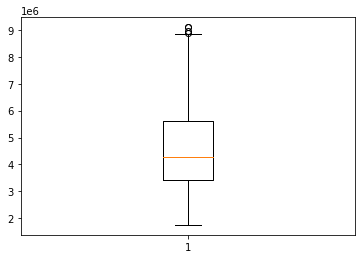

In [126]:
# Dealing with outliers in price 
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

plt.boxplot(df.price)



{'whiskers': [<matplotlib.lines.Line2D at 0x1fde23d6490>,
 'caps': [<matplotlib.lines.Line2D at 0x1fde23d6af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fde23d6400>],
 'medians': [<matplotlib.lines.Line2D at 0x1fde23d6a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fde23b9be0>],
 'means': []}

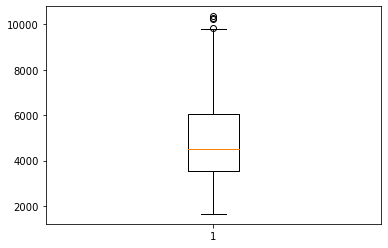

In [127]:
# Dealing with outliers in srea 

Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)


<AxesSubplot:xlabel='furnishingstatus', ylabel='price'>

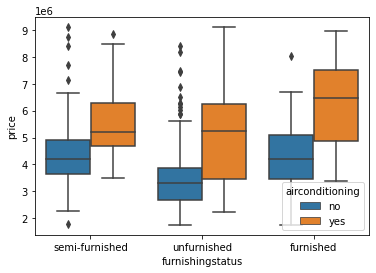

In [128]:
sns.boxplot(x = df['furnishingstatus'], y = df['price'], hue = df['airconditioning'])

<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

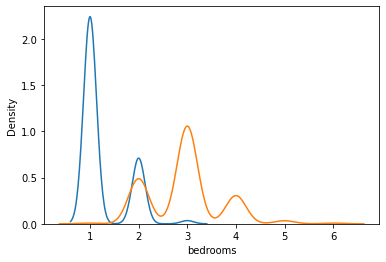

In [129]:
sns.distplot(df["bathrooms"],hist=False)
sns.distplot(df["bedrooms"],hist=False)

<AxesSubplot:xlabel='parking', ylabel='Density'>

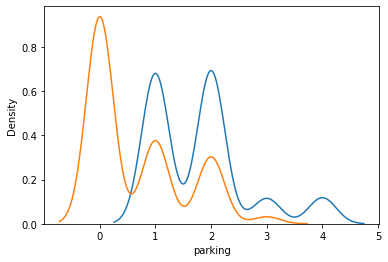

In [130]:
sns.distplot(df["stories"],hist=False)
sns.distplot(df["parking"],hist=False)

<AxesSubplot:>

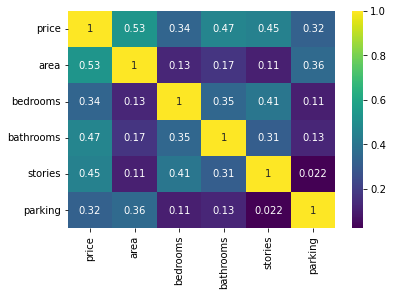

In [131]:
sns.heatmap(df.corr(),annot = True, cmap = "viridis")

<AxesSubplot:xlabel='area', ylabel='price'>

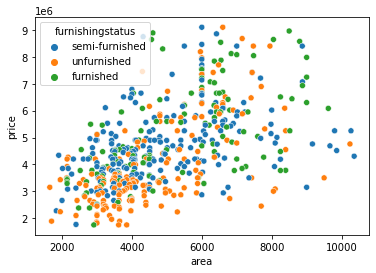

In [132]:
sns.scatterplot(x = df["area"], y = df["price"], hue = df["furnishingstatus"])

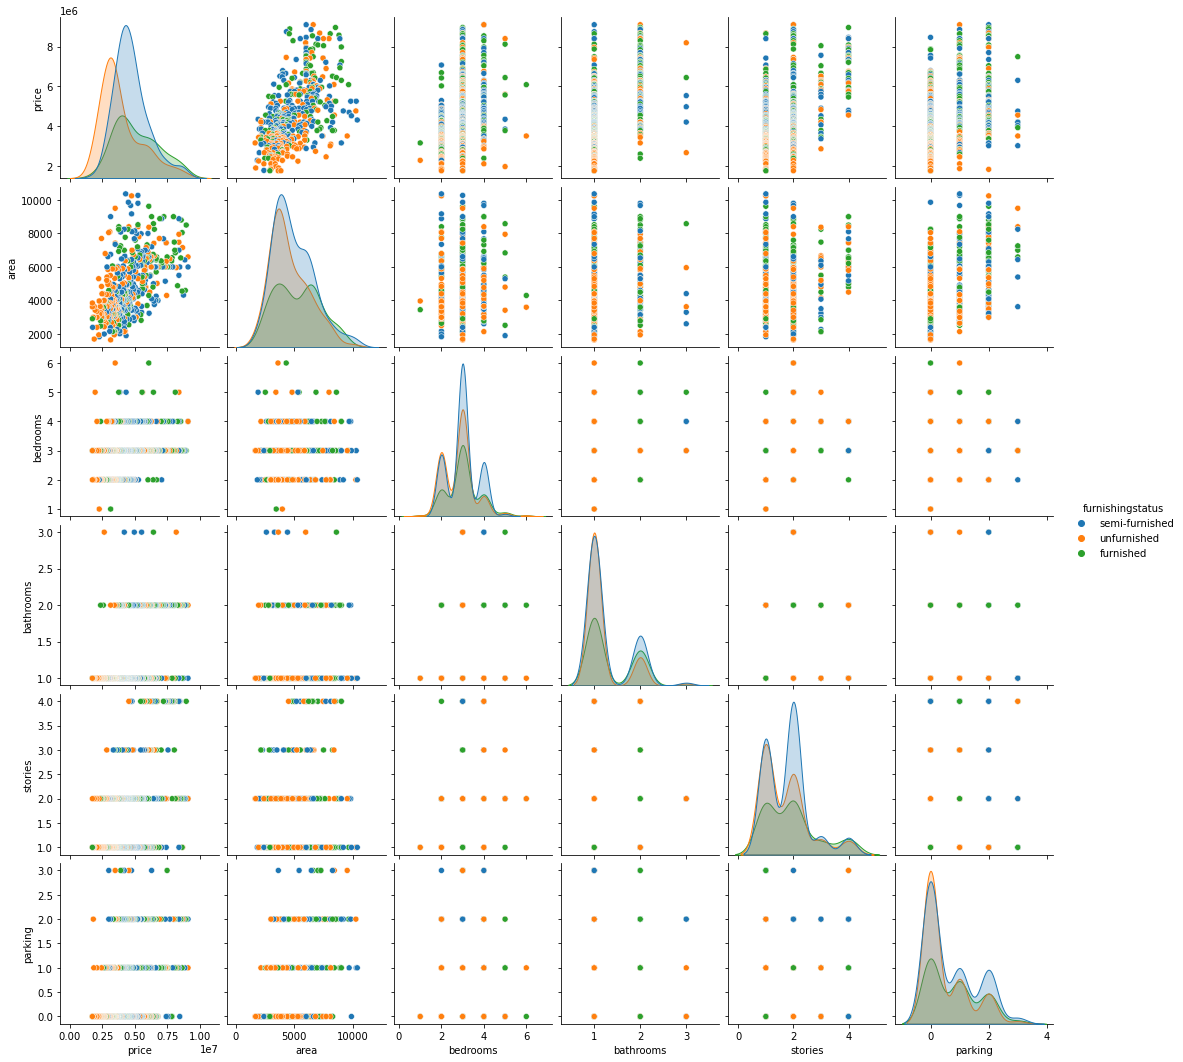

In [134]:
sns.pairplot(df, hue = "furnishingstatus")

# FEATURE ENGINEERING

In [135]:
# one-hot encoding for categorical factors
data = df.copy()
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
15,9100000,6000,4,1,2,2,1,0,1,0,1,0,0,0
16,9100000,6600,4,2,2,1,0,1,1,1,1,0,1,1
17,8960000,8500,3,2,4,2,0,0,1,0,0,0,1,0
18,8890000,4600,3,2,2,2,0,0,1,1,0,0,1,0
19,8855000,6420,3,2,2,1,1,0,1,0,0,0,1,1


In [136]:
X = data.drop(['price'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [137]:
# standardizing the values

scaler = MinMaxScaler()
scaler.fit(X_train)
x_train_scaledvalues = scaler.transform(X_train)
x_test_scaledvalues = scaler.transform(X_test)

In [138]:
model = {
    'Random Forest Regressor' : RandomForestRegressor(),
    'Decision tree regressor' : DecisionTreeRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'Support Vector regressor' : SVR(),
    'Lasso Reg' : Lasso(),
    'Ridge Reg' : Ridge(),
    
}

In [139]:
pred ={}


for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[name]=y_pred

# MODEL EVALUATION

Results for Random Forest Regressor : 
Mean Square Erroe : 1029128403918.5481
R2 Score : 0.6513887438873693


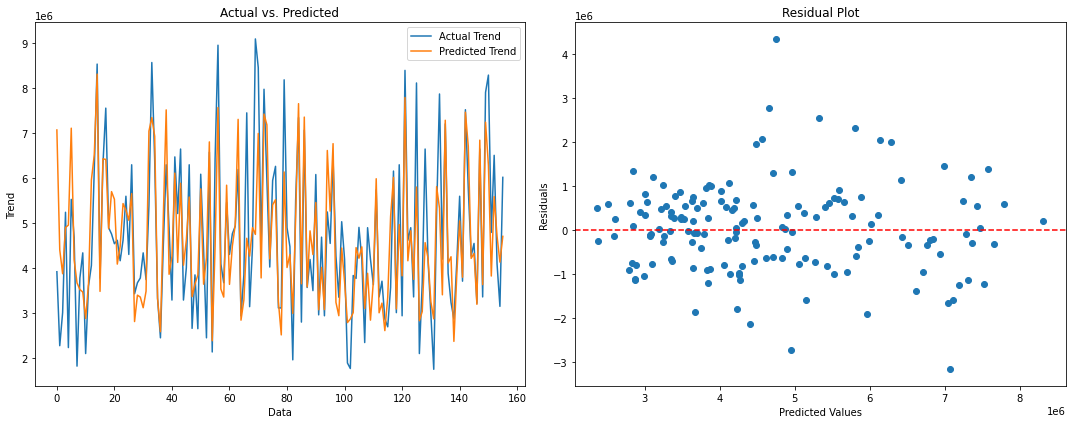

Results for Decision tree regressor : 
Mean Square Erroe : 1813592747408.9744
R2 Score : 0.38565601401762595


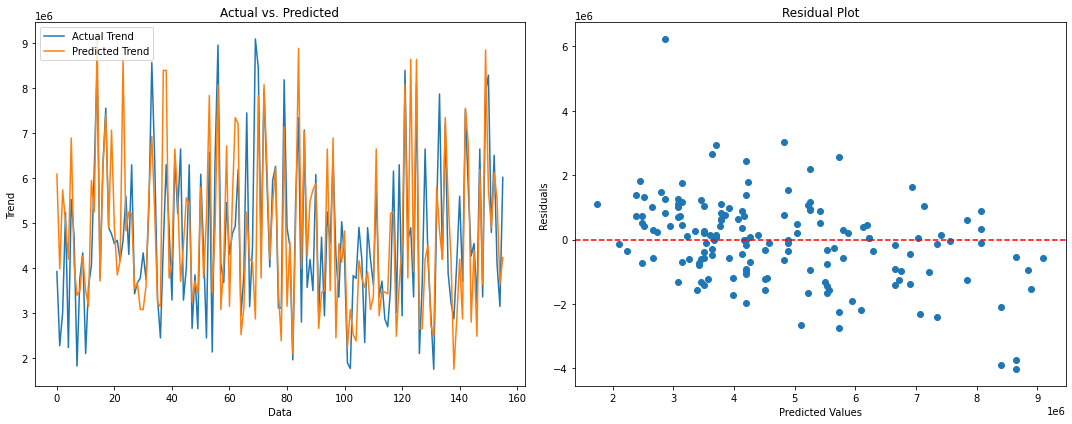

Results for Gradient Boost Regressor : 
Mean Square Erroe : 917996151218.5565
R2 Score : 0.68903414757155


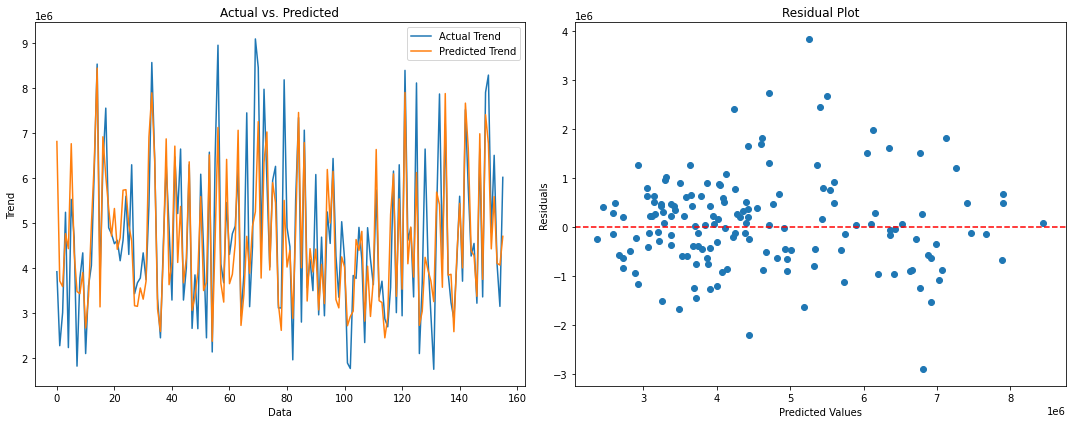

Results for Support Vector regressor : 
Mean Square Erroe : 3198524861116.822
R2 Score : -0.0834816775979923


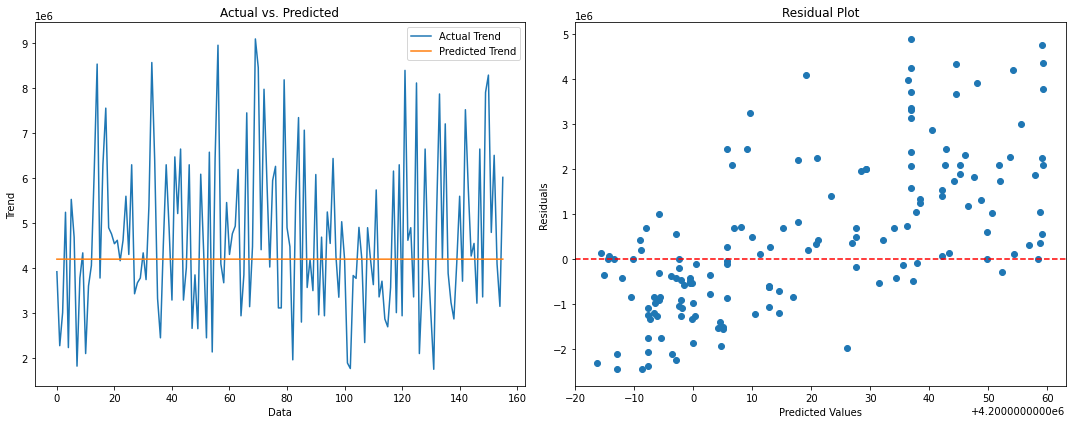

Results for Lasso Reg : 
Mean Square Erroe : 855741685449.5315
R2 Score : 0.7101224854579837


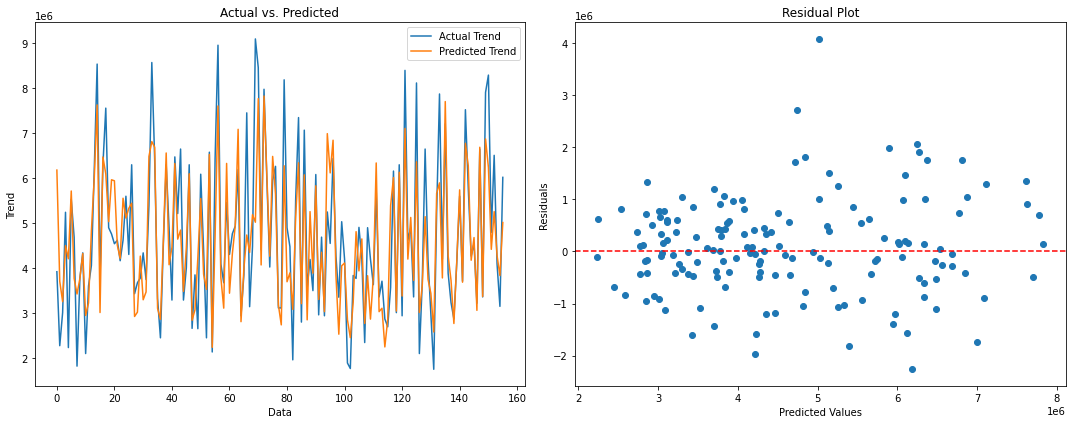

Results for Ridge Reg : 
Mean Square Erroe : 856959662079.8175
R2 Score : 0.7097099029645038


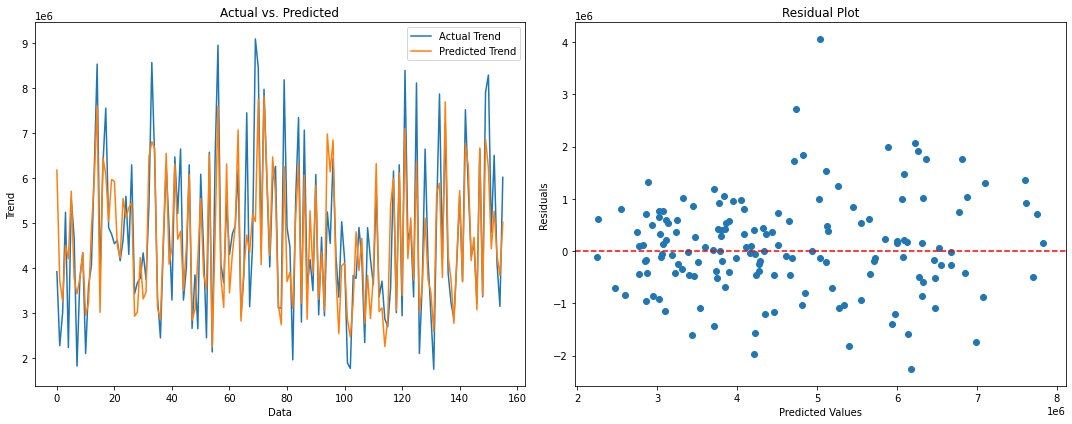

In [140]:
acc= {} 
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Erroe : {mse}")
    print(f"R2 Score : {r2}")
    plt.figure(figsize=(15, 6))

# Plot Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')

    # Plot Residuals
    residuals = y_test - y_pred

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()


INFERENCES:
* Lasso reg and ridge reg models have relatively higher accuracy compared to other models.
* svm has a negative accuracy which indicates poor performance.
* Random forest regressor and gradient boosting regressor also have moderate     accuracy.

In [141]:
data = pd.DataFrame.from_dict(acc, orient='index', columns=['Accuracy'])
data

,Accuracy
Random Forest Regressor,0.651389
Decision tree regressor,0.385656
Gradient Boost Regressor,0.689034
Support Vector regressor,-0.083482
Lasso Reg,0.710122
Ridge Reg,0.709710


INFERENCES:

* Random Forest Regressor achieved an accuracy of 0.651389, indicating moderate performance.
* Gradient Boost Regressor performed relatively similar to random forest regressor with an accuracy of 0.689034.
* Support Vector Regressor had a negative accuracy of -0.083482, indicating poor performance on the given regression problem.
* Lasso Reg showed "good performance" with an accuracy of 0.710122.
* Ridge Reg achieved a "similar accuracy" of 0.709710, indicating its effectiveness in the regression task.
